In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp
from sklearn import cross_validation as cv
from neupy.algorithms import GRNN as grnn
from neupy.estimators import mse

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 外部验证

In [2]:
data_evaluation =pd.read_excel('data_GRNN.xlsx',index_col='Date')[-12:]

In [3]:
## 绝对误差
data_evaluation['Dist_ARIMA'] =abs(data_evaluation['forecast']-data_evaluation['Incidence_rate'])
data_evaluation['Dist_GRNN'] = abs(data_evaluation['NN']-data_evaluation['Incidence_rate'])
data_evaluation['Better'] = data_evaluation['Dist_ARIMA']  - data_evaluation['Dist_GRNN'] 

data_evaluation['error_ARIMA'] = data_evaluation['forecast']-data_evaluation['Incidence_rate']
data_evaluation['error_GRNN'] = data_evaluation['NN']-data_evaluation['Incidence_rate']

## 相对误差
data_evaluation['ARIMA_per']  = (data_evaluation['Dist_ARIMA']/data_evaluation['Incidence_rate'])*100
data_evaluation['GRNN_per'] = (data_evaluation['Dist_GRNN']/data_evaluation['Incidence_rate'])*100

np.mean(data_evaluation['ARIMA_per'])
np.mean(data_evaluation['GRNN_per'])

5.143377182844131

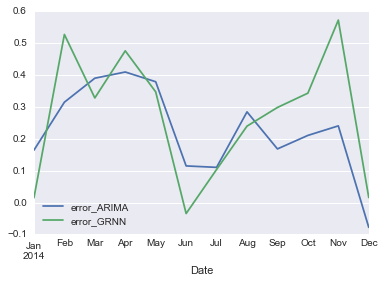

In [4]:
data_evaluation[['error_ARIMA','error_GRNN']].plot()

In [5]:
sum(data_evaluation['Dist_ARIMA'])

2.8626964737437941

In [6]:
sum(data_evaluation['Dist_GRNN'])

3.2991789104676252

In [7]:
sum(data_evaluation['Better']>0)

7

In [8]:
sum(data_evaluation['Better'])

-0.43648243672383114

In [9]:
np.mean(data_evaluation['Better'])/data_evaluation['Incidence_rate'].mean()*100

-0.6650775007557197

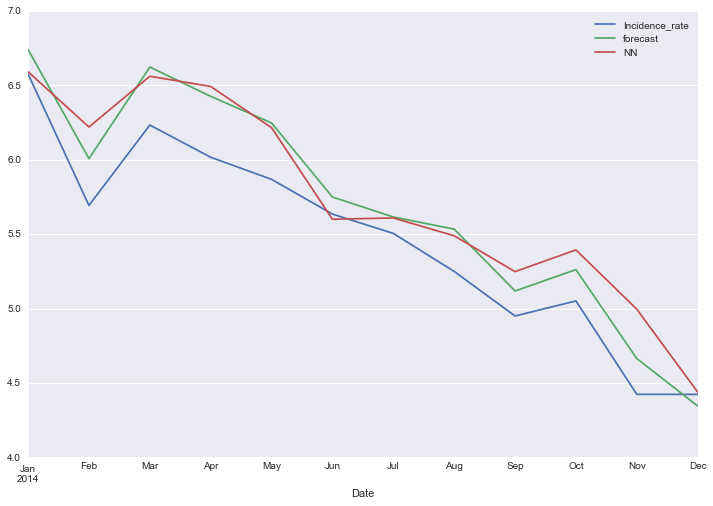

In [10]:
data_evaluation[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 内部验证

In [11]:
data_intro =pd.read_excel('data_GRNN.xlsx',index_col='Date')[:-12]

In [12]:
## 绝对误差
data_intro['Dist_ARIMA'] =abs(data_intro['forecast']-data_intro['Incidence_rate'])
data_intro['Dist_GRNN'] = abs(data_intro['NN']-data_intro['Incidence_rate'])
data_intro['Better'] = data_intro['Dist_ARIMA']  - data_intro['Dist_GRNN'] 

## 相对误差
data_intro['ARIMA_per']  = (data_intro['Dist_ARIMA']/data_intro['Incidence_rate'])*100
data_intro['GRNN_per'] = (data_intro['Dist_GRNN']/data_intro['Incidence_rate'])*100



In [13]:
np.mean(data_intro['Dist_ARIMA'])

0.36309655094463678

In [14]:
np.mean(data_intro['Dist_GRNN'])

0.2259389333056967

In [15]:
np.mean(data_intro['Better']>0)

0.64485981308411211

In [16]:
sum(data_intro['Better'])

14.675865087366574

In [17]:
np.mean(data_intro['Better'])/data_intro['Incidence_rate'].mean()*100

2.0518026694472775

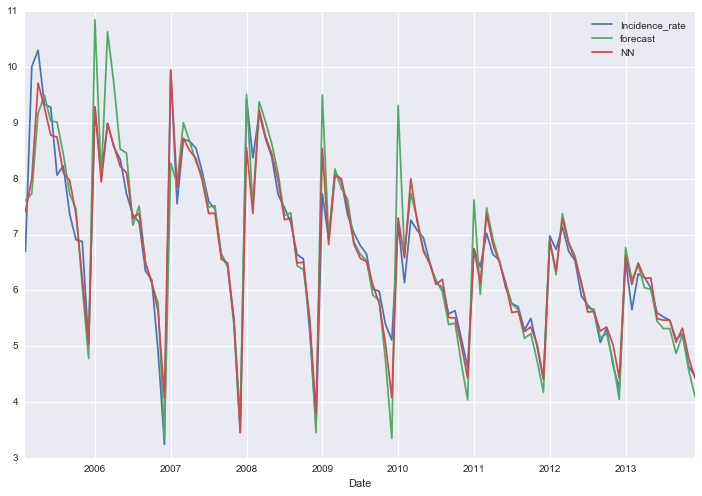

In [18]:
data_intro[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 数据集验证

In [19]:
data_total =pd.read_excel('data_GRNN.xlsx',index_col='Date')

In [20]:
## 绝对误差
data_total['Dist_ARIMA'] = abs(data_total['forecast']-data_total['Incidence_rate'])
data_total['Dist_GRNN'] = abs(data_total['NN']-data_total['Incidence_rate'])
data_total['Better'] = data_total['Dist_ARIMA']  - data_total['Dist_GRNN'] 
data_total['error_ARIMA'] = data_total['forecast']-data_total['Incidence_rate']
data_total['error_GRNN'] = data_total['NN']-data_total['Incidence_rate']

## 相对误差
data_total['ARIMA_per']  = (data_total['Dist_ARIMA']/data_total['Incidence_rate'])*100
data_total['GRNN_per'] = (data_total['Dist_GRNN']/data_total['Incidence_rate'])*100

In [21]:
np.mean(data_total['Dist_ARIMA'])

0.35053804558672202

In [22]:
np.mean(data_total['Dist_GRNN'])

0.23087936785022836

In [23]:
np.mean(data_total['Better']>0)

0.6386554621848739

In [24]:
sum(data_total['Better'])

14.239382650642746

In [25]:
np.mean(data_total['Better'])/data_total['Incidence_rate'].mean()*100

1.8234679400024016

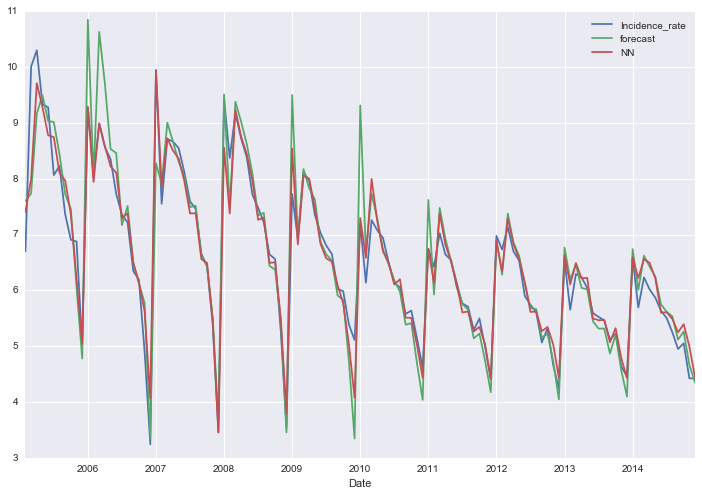

In [26]:
data_total[['Incidence_rate','forecast','NN']].plot(figsize=(12, 8)) 

### 残差检验

In [27]:
data_total[['Dist_ARIMA','Dist_GRNN']]

,Dist_ARIMA,Dist_GRNN
Date,,
2005-02-01,0.905622,7.022484e-01
2005-03-01,2.274768,2.012376e+00
2005-04-01,1.130813,5.876062e-01
2005-05-01,0.161727,5.227359e-02
2005-06-01,0.247460,5.011661e-01
2005-07-01,0.951656,6.800974e-01
2005-08-01,0.209665,1.237234e-01
2005-09-01,0.362162,6.055667e-01
2005-10-01,0.551448,4.552241e-01


,Incidence_rate,forecast,Jan,NN,Dist_ARIMA,Dist_GRNN,Better,error_ARIMA,error_GRNN,ARIMA_per,GRNN_per
Date,,,,,,,,,,,
2007-04-01,8.668623,8.665630,False,8.504878,0.002993,1.637450e-01,-0.160752,-0.002993,-1.637450e-01,0.034528,1.888939e+00
2009-02-01,6.920528,6.916806,False,6.824464,0.003723,9.606439e-02,-0.092342,-0.003723,-9.606439e-02,0.053791,1.388108e+00
2007-10-01,6.435414,6.428129,False,6.492653,0.007285,5.723913e-02,-0.049954,-0.007285,5.723913e-02,0.113201,8.894397e-01
2011-07-01,5.766383,5.755831,False,5.604119,0.010551,1.622634e-01,-0.151712,-0.010551,-1.622634e-01,0.182979,2.813955e+00
2013-10-01,5.223406,5.206369,False,5.322950,0.017037,9.954476e-02,-0.082508,-0.017037,9.954476e-02,0.326164,1.905744e+00
2011-05-01,6.546674,6.528592,False,6.513840,0.018082,3.283369e-02,-0.014752,-0.018082,-3.283369e-02,0.276200,5.015324e-01
2013-05-01,6.045021,6.018887,False,6.222757,0.026134,1.777361e-01,-0.151602,-0.026134,1.777361e-01,0.432320,2.940207e+00
2007-09-01,6.657175,6.623108,False,6.561334,0.034067,9.584096e-02,-0.061774,-0.034067,-9.584096e-02,0.511736,1.439664e+00
2010-06-01,6.502765,6.468425,False,6.492954,0.034340,9.810503e-03,0.024529,-0.034340,-9.810503e-03,0.528077,1.508666e-01


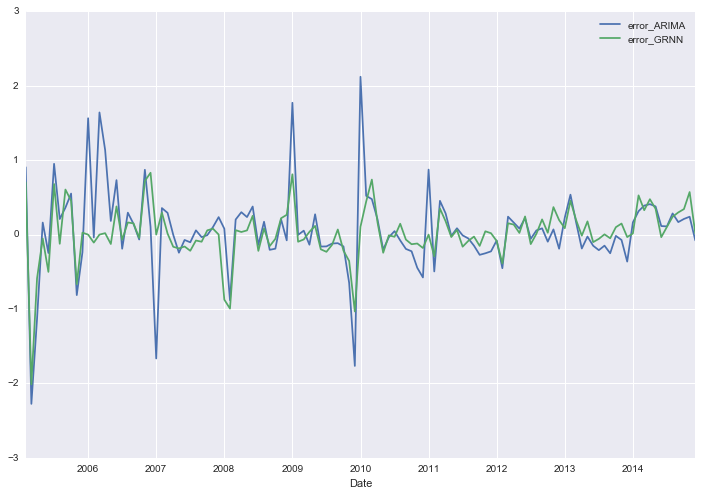

In [29]:
data_total[['error_ARIMA','error_GRNN']].plot(figsize=(12, 8)) 